# Support Vector Machines

In [66]:
from sklearn import svm 
import scipy.io
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
import csv

#### Loading in the datasets

In [67]:
##need to train and load digit data
dataset_training=scipy.io.loadmat('data/digit-dataset/train.mat')


###need to train and load spam/ham data
spam_ham_data = scipy.io.loadmat('data/spam-dataset/spam_data.mat')
spam_ham_labels = spam_ham_data['training_labels']
spam_ham_training = spam_ham_data['training_data']


In [68]:
##loading in testing data for spam
digit_testing = np.transpose(scipy.io.loadmat('data/digit-dataset/test.mat')['test_images'], (2,1,0))
digit_testing_flattened= np.zeros((10000,784))
dtf = 0
for dtInd in range(0,10000):
    digit_testing_flattened[dtf] = digit_testing[:,:,dtInd].reshape(784)
    dtf = dtf+1

## Problem 1 & Problem 2
#### Following code used to reshape and flatten the digit training set

In [69]:
##need to reshape data to be able to use the SVC algorithm 
dataset_training_images = dataset_training['train_images'] ##is a [60000,28,28] matrix
dataset_training_labels = dataset_training['train_labels'] ##row of 60000

##creating validation data set 
## initializes zero matrices in numpy 
validation_indeces = random.sample(range(0,60000), 10000)

new_training_data = np.zeros((50000,784))
training_labels = np.zeros(50000)

validation_data= np.zeros((10000,784))
validation_labels = np.zeros(10000)

tdata_i = 0
vdata_i = 0

for ind in range(0,60000):
	if ind in validation_indeces:
		validation_data[vdata_i] = dataset_training_images[:,:,ind].reshape(784)
		validation_labels[vdata_i] = dataset_training_labels[ind]
		vdata_i = vdata_i + 1 
	else:
		new_training_data[tdata_i] = dataset_training_images[:,:,ind].reshape(784)
		training_labels[tdata_i] = dataset_training_labels[ind]
		tdata_i = tdata_i + 1





#### The following definition is used to generate the confusion matrices for Problem 2. 

In [70]:
###need to plot confusion matrix
classification_names = ["0","1","2","3","4","5","6","7","8","9"]
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classification_names))
    plt.xticks(tick_marks,classification_names, rotation=45)
    plt.yticks(tick_marks, classification_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#### The following segments split up the training data into the desired sample amounts and trains the SVM model with each sample.
#### The samples were also used to create cross validation sets and generate confusion matrices. 

In [71]:
###want to go through and get 100, 200, 500, 1000, 2000, 5000, 10000 samples from training to run cross validation 
##training the data -- need to randomly sample within the split data set:
numSamples = [100, 200, 500, 1000, 2000, 5000, 10000]
training10000=[]
storedErrorRates = []
predictedValues = []

we're on sample:
100
Normalized confusion matrix
[[ 1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.57142857  0.07142857  0.          0.          0.07142857
   0.          0.21428571  0.07142857  0.        ]
 [ 0.          0.          0.8         0.          0.          0.          0.1
   0.          0.1         0.        ]
 [ 0.          0.          0.08333333  0.75        0.          0.08333333
   0.          0.08333333  0.          0.        ]
 [ 0.          0.05        0.          0.          0.65        0.05        0.05
   0.05        0.          0.15      ]
 [ 0.11111111  0.          0.          0.          0.          0.66666667
   0.11111111  0.11111111  0.          0.        ]
 [ 0.          0.          0.09090909  0.          0.          0.
   0.81818182  0.          0.09090909  0.        ]
 [ 0.          0.          0.          0.          0.1         0.          0.
   0.8         0.          

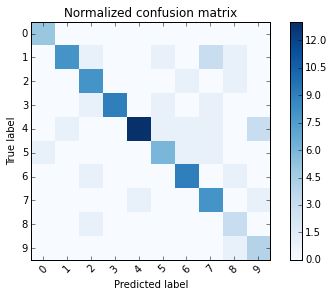

we're on sample:
200
Normalized confusion matrix
[[ 0.87096774  0.          0.03225806  0.03225806  0.          0.          0.
   0.          0.03225806  0.03225806]
 [ 0.          0.67647059  0.02941176  0.          0.05882353  0.08823529
   0.          0.05882353  0.08823529  0.        ]
 [ 0.          0.          0.68421053  0.05263158  0.          0.
   0.15789474  0.05263158  0.          0.05263158]
 [ 0.          0.          0.          0.75        0.          0.1875      0.
   0.0625      0.          0.        ]
 [ 0.          0.          0.          0.          0.71428571  0.07142857
   0.07142857  0.          0.          0.14285714]
 [ 0.          0.          0.          0.08333333  0.          0.83333333
   0.          0.08333333  0.          0.        ]
 [ 0.05555556  0.          0.05555556  0.          0.05555556  0.05555556
   0.66666667  0.          0.11111111  0.        ]
 [ 0.          0.09090909  0.          0.          0.          0.          0.
   0.81818182  0.     

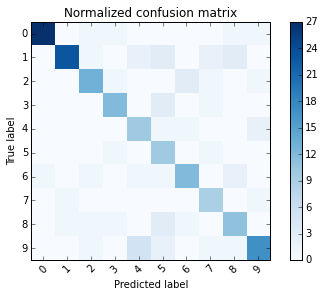

we're on sample:
500
Normalized confusion matrix
[[ 0.83870968  0.          0.0483871   0.03225806  0.          0.03225806
   0.01612903  0.          0.          0.03225806]
 [ 0.0125      0.7875      0.0125      0.0125      0.025       0.025
   0.0125      0.025       0.075       0.0125    ]
 [ 0.          0.          0.83673469  0.06122449  0.          0.
   0.02040816  0.02040816  0.06122449  0.        ]
 [ 0.02380952  0.          0.02380952  0.78571429  0.          0.07142857
   0.          0.          0.07142857  0.02380952]
 [ 0.01960784  0.          0.03921569  0.          0.82352941  0.01960784
   0.03921569  0.01960784  0.          0.03921569]
 [ 0.          0.          0.          0.13333333  0.          0.8         0.
   0.          0.03333333  0.03333333]
 [ 0.          0.          0.04545455  0.          0.          0.06818182
   0.84090909  0.          0.02272727  0.02272727]
 [ 0.          0.          0.          0.01612903  0.          0.03225806
   0.          0.870967

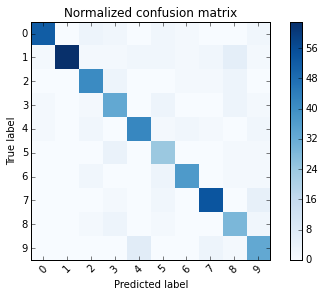

we're on sample:
1000
Normalized confusion matrix
[[ 0.90909091  0.          0.          0.          0.          0.05050505
   0.          0.02020202  0.          0.02020202]
 [ 0.          0.83035714  0.          0.02678571  0.00892857  0.          0.
   0.00892857  0.08928571  0.03571429]
 [ 0.          0.          0.85        0.04        0.          0.02        0.01
   0.01        0.06        0.01      ]
 [ 0.          0.          0.01886792  0.78301887  0.          0.02830189
   0.          0.02830189  0.12264151  0.01886792]
 [ 0.          0.          0.01834862  0.          0.76146789  0.01834862
   0.00917431  0.05504587  0.04587156  0.09174312]
 [ 0.          0.          0.          0.125       0.          0.75961538
   0.01923077  0.          0.08653846  0.00961538]
 [ 0.          0.          0.03614458  0.02409639  0.03614458  0.01204819
   0.87951807  0.          0.01204819  0.        ]
 [ 0.          0.          0.          0.01010101  0.          0.          0.
   0.848484

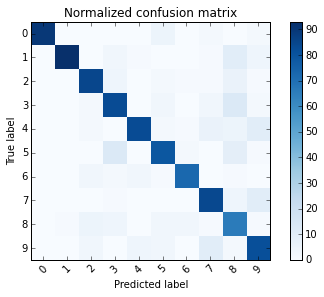

we're on sample:
2000
Normalized confusion matrix
[[ 0.91203704  0.          0.00462963  0.          0.01388889  0.01388889
   0.00925926  0.00925926  0.01388889  0.02314815]
 [ 0.          0.86792453  0.01886792  0.01132075  0.00754717  0.01132075
   0.02264151  0.01132075  0.04528302  0.00377358]
 [ 0.          0.01657459  0.76243094  0.03314917  0.02209945  0.02209945
   0.06077348  0.02762431  0.04972376  0.00552486]
 [ 0.01025641  0.01025641  0.00512821  0.8         0.00512821  0.05641026
   0.00512821  0.02051282  0.07179487  0.01538462]
 [ 0.          0.0046729   0.01869159  0.          0.87383178  0.00934579
   0.00934579  0.01869159  0.01401869  0.05140187]
 [ 0.          0.          0.          0.04278075  0.00534759  0.85026738
   0.02139037  0.00534759  0.06417112  0.01069519]
 [ 0.03550296  0.          0.02366864  0.          0.00591716  0.01775148
   0.88757396  0.          0.0295858   0.        ]
 [ 0.00546448  0.          0.          0.03278689  0.          0.
   0.0054

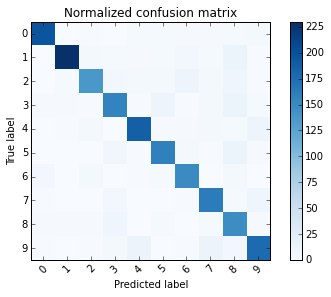

we're on sample:
5000
Normalized confusion matrix
[[ 0.91035857  0.          0.01195219  0.01394422  0.00398406  0.01992032
   0.01593625  0.00199203  0.01394422  0.00796813]
 [ 0.          0.88943089  0.01300813  0.01138211  0.00650407  0.01626016
   0.00487805  0.01138211  0.03577236  0.01138211]
 [ 0.00716846  0.00358423  0.83691756  0.03584229  0.01971326  0.01075269
   0.02508961  0.02150538  0.02329749  0.01612903]
 [ 0.00393701  0.          0.01574803  0.84448819  0.0019685   0.06692913
   0.          0.01377953  0.03937008  0.01377953]
 [ 0.00189394  0.00378788  0.02083333  0.00189394  0.84280303  0.03219697
   0.02462121  0.0094697   0.00189394  0.06060606]
 [ 0.01804124  0.00257732  0.          0.07474227  0.00515464  0.80927835
   0.00773196  0.00257732  0.07216495  0.00773196]
 [ 0.01476793  0.          0.02320675  0.00843882  0.02109705  0.01898734
   0.9092827   0.          0.00421941  0.        ]
 [ 0.          0.          0.01207243  0.01006036  0.01408451  0.00201207
 

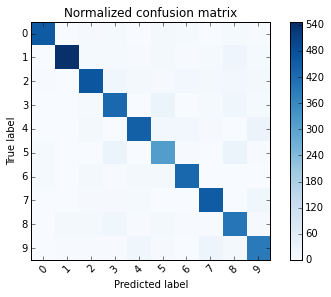

we're on sample:
10000
Normalized confusion matrix
[[ 0.93146718  0.          0.01447876  0.00675676  0.003861    0.01254826
   0.00772201  0.00289575  0.01158301  0.00868726]
 [ 0.00175131  0.92119089  0.01050788  0.00875657  0.00350263  0.00700525
   0.0061296   0.00525394  0.02889667  0.00700525]
 [ 0.00280899  0.00093633  0.86610487  0.0252809   0.01404494  0.01404494
   0.01872659  0.01685393  0.03558052  0.00561798]
 [ 0.00561798  0.00374532  0.03183521  0.82022472  0.00280899  0.05992509
   0.00093633  0.01217228  0.04775281  0.01498127]
 [ 0.00367309  0.00275482  0.02571166  0.00275482  0.83654729  0.0137741
   0.01561065  0.02020202  0.01101928  0.06795225]
 [ 0.01603666  0.00687285  0.00801833  0.06071019  0.00114548  0.81328751
   0.01718213  0.00687285  0.06414662  0.00572738]
 [ 0.00326087  0.00108696  0.02391304  0.00326087  0.01086957  0.01195652
   0.92717391  0.          0.0173913   0.00108696]
 [ 0.          0.00194363  0.00874636  0.00291545  0.00777454  0.
   0.0009

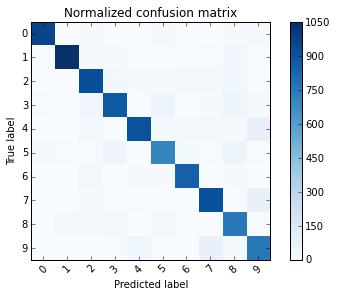

In [72]:
for nSample in numSamples:
    print "we're on sample:"
    print nSample
    randomTrain = random.sample(range(0,50000), nSample) 
    randomValidate = random.sample(range(0,10000), nSample)

    storedTrain = np.zeros((nSample,784))
    storedTrainLabels = np.zeros(nSample)

    ##for problem 2
    storedValidate = np.zeros((nSample,784)) 
    storedValidateLabels = np.zeros(nSample)
    
    stoInd = 0
    for ranT in range(0,nSample):
        storedTrain[stoInd] = new_training_data[randomTrain[ranT], :]
        storedTrainLabels[stoInd] = training_labels[randomTrain[ranT]]
        
        storedValidate[stoInd] = validation_data[randomValidate[ranT], :]
        storedValidateLabels[stoInd] = validation_labels[randomValidate[ranT]]
        
        if nSample == 10000:
            training10000.append(storedTrain)
            training10000.append(storedTrainLabels)
        
        stoInd = stoInd + 1

    ##train and validate set
    clf = svm.SVC(decision_function_shape='ovo', kernel='linear')
    clf.fit(storedTrain, storedTrainLabels)
    score = clf.score(validation_data, validation_labels) ##calcualtes score of cross-validation --> 1- error rate
    storedErrorRates.append(np.float(1)-score)
    
    ##### calculating predcitions for the confusion matrix
    predict = clf.predict(storedValidate) #will use validation set
    cm = confusion_matrix(predict, storedValidateLabels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print cm_normalized
    ##need to plot the confusion matrices
    plt.figure()
    plot_confusion_matrix(cm, title='Normalized confusion matrix')
    plt.show()
    
    

##Confusion Matrices
###The above confusion matrices allow for us to see which digits are more incorrectly/correctly classified than others. The more heavily shaded squares indicate those that have been classified properly, and lie along the diagonal of the matrix. As the number of samples increase, this diagonal becomes shaded more heavily, indicating that the validation results in a lower error rate with an increasing number of samples. This allows for us to notice certain digits that are continuously miscategorized by the algorithm, and to add features that may allow for these digits to be better classified. 

##Validation Error Rate
###The following plot was created using the error rate calculated from training the SVM on varying sample sets and a validation set of 10,000. As expected, the validation becomes better with an increased number of training samples until increasing the number of training samples no longer has a positive effect on the error rate. 

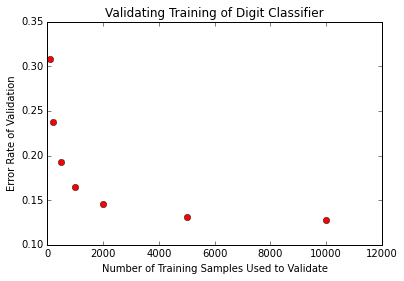

In [73]:
### need to plot error rate vs. number of samples
plt.plot(numSamples, storedErrorRates,'ro')
plt.xlabel('Number of Training Samples Used to Validate')
plt.ylabel('Error Rate of Validation')
plt.title('Validating Training of Digit Classifier')
axes = plt.gca()
axes.set_xlim([0,12000])
plt.show()

## Problem 3 & Problem 4
### The following segments of code generate k-fold cross validation scores for the 10,000 sample digit training set and the spam-ham dataset. 

### K-fold Cross validation is important as it prevents over-fitting. The process takes the training data and splits it into k parts, with each part being a part of the training and the validation set. As the hyperparameter C is manually chosen, by running k-fold cross validation, it allows us to see how the model would fit for digit data in general rather than the training data that is given. 

In [74]:
def kFold_crossValidation(data, cValue, k): #data is a tuple of training data and labels
    splitEntriesData = np.split(data[0], k) #results in an np.array of k np.arrays
    splitEntriesLabel = np.split(data[1],k)
    kFoldScores = []
    ind = 0
    while ind < k:
        #want to train& fit data on k-1 entries, validate on kth entry
        validationData = splitEntriesData[ind]
        validationLabels = splitEntriesLabel[ind]
        trainingData = np.array([]) 
        trainingLabels = np.array([])
        for splitE in range(k):
            if splitE != ind:
                if len(trainingData) == 0:
                    trainingData = splitEntriesData[splitE]
                    trainingLabels = splitEntriesLabel[splitE]
                else:
                    trainingData = np.vstack((trainingData, splitEntriesData[splitE]))
                    trainingLabels = np.append(trainingLabels, splitEntriesLabel[splitE])
        ##fit data
        clf2 = svm.SVC(decision_function_shape='ovo', kernel='linear', C=cValue)
        clf2.fit(trainingData, trainingLabels)
        score = clf2.score(splitEntriesData[ind], splitEntriesLabel[ind]) ##calcualtes score of cross-validation --> 1- error rate
        kFoldScores.append(score)
        
        ind = ind + 1
    
    return kFoldScores


#### The following k-fold cross validation and results were found for the 10,000 samples of the digit dataset. 

In [75]:
##need to validate the 10000 data set
validationOf10000 = kFold_crossValidation(training10000, 0.000001, 10)
print validationOf10000

[0.90800000000000003, 0.93999999999999995, 0.90900000000000003, 0.90800000000000003, 0.91000000000000003, 0.90300000000000002, 0.90500000000000003, 0.89700000000000002, 0.90900000000000003, 0.89400000000000002]


In [76]:
##need to make sure that the c-value generalizes to all possible data
clf_digit_validate_cvalue = svm.SVC(decision_function_shape='ovo', kernel='linear', C=0.000001)
clf_digit_validate_cvalue.fit(training10000[0],training10000[1])
print clf_digit_validate_cvalue.score(validation_data, validation_labels)

0.9043


## Problem 3 - Digit Dataset Kaggle Training

### The following sections of code are used to train the SVM model found from performing k-fold cross validation on the entire digit dataset. 

In [77]:
##testing for kaggle
clf_digit_kaggle = svm.SVC(decision_function_shape='ovo', kernel='linear', C=0.000001)
clf_digit_kaggle.fit(training10000[0], training10000[1])
digit_predictions = clf_digit_kaggle.predict(digit_testing_flattened)

In [78]:
with open('results/digit_predictions.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','Category'])
    d = 1
    for digpred in digit_predictions:
        writer.writerow([d,int(digpred)])
        d = d+ 1

#### The highest Kaggle score attained by the above model for the digit dataset is 0.91300. 

## Problem 4 

### The following sections of code are used to perform k-fold cross validation on the spam-ham data set. 

In [79]:
###need to separate data set into training and validation -- will use 75% for training, 25% for validation
numValidation = 1302
numTraining = spam_ham_training.shape[0]- numValidation

validation_indeces_spam = random.sample(range(0,spam_ham_training.shape[0]), numValidation)

storedTrain_spam = np.zeros((numTraining,spam_ham_training.shape[1]))
storedTrainLabels_spam = np.zeros(numTraining)

storedValidate_spam = np.zeros((numValidation,spam_ham_training.shape[1])) 
storedValidateLabels_spam = np.zeros(numValidation)
    
stVal_sp = 0
stTra_sp = 0
for ind_spam in range(spam_ham_training.shape[0]):
    if ind_spam in validation_indeces_spam:
        storedValidate_spam[stVal_sp] = spam_ham_training[ind_spam, :]
        storedValidateLabels_spam[stVal_sp] = spam_ham_labels[0][ind_spam]
        stVal_sp = stVal_sp + 1 
    else:
        storedTrain_spam[stTra_sp] = spam_ham_training[ind_spam,:]
        storedTrainLabels_spam[stTra_sp] = spam_ham_labels[0][ind_spam]
        stTra_sp = stTra_sp + 1        


In [85]:
###want to perform cross validation on trianing set for spam and ham data 
validationOfSpamHam = kFold_crossValidation([storedTrain_spam, storedTrainLabels_spam], 30, 10)
print validationOfSpamHam

[0.26356589147286824, 0.31266149870801035, 0.4289405684754522, 0.96640826873385011, 0.97674418604651159, 0.9715762273901809, 0.95348837209302328, 0.98449612403100772, 0.93540051679586567, 0.91214470284237725]


In [89]:
##need to make sure that the c-value generalizes to all possible data
clf_spam_validate_cvalue = svm.SVC(decision_function_shape='ovo', kernel='linear', C=30)
clf_spam_validate_cvalue.fit(storedTrain_spam,storedTrainLabels_spam)
print clf_spam_validate_cvalue.score(storedValidate_spam, storedValidateLabels_spam)

0.806451612903


### Train the SVM found from performing k-fold cross validation on the spam-ham dataset. 

In [82]:
###want to train model on all of dataset for spam/ham
spam_ham_test = spam_ham_data['test_data']

In [83]:
clf_ham_kaggle = svm.SVC(decision_function_shape='ovo', kernel='linear', C=30)
clf_ham_kaggle.fit(spam_ham_training, spam_ham_labels[0])
spam_ham_predictions = clf_ham_kaggle.predict(spam_ham_test) 


In [84]:
with open('results/spam_ham_predictions.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','Category'])
    sh = 1
    for sphpred in spam_ham_predictions:
        writer.writerow([sh,int(sphpred)])
        sh = sh + 1

#### The highest kaggle score found from the above model for spam-ham dataset is 0.737.